Enter the 2D coordinated separated by semicolon (e.g. 1 1; 2 2;.....:  1 1; 2 2; 3 2; 3 1; 1.5 0.5


The Initial Centroids are: 
k1:  [3.0, 2.0]
k2:  [1.5, 0.5]
The Clusters are: 
k1: : [[2.0, 2.0], [3.0, 2.0], [3.0, 1.0]]
k2: : [[1.0, 1.0], [1.5, 0.5]]
The centroids are: 
m1:  [2.67, 1.67]
m2:  [1.25, 0.75]

The Clusters are: 
k1: : [[2.0, 2.0], [3.0, 2.0], [3.0, 1.0]]
k2: : [[1.0, 1.0], [1.5, 0.5]]
The centroids are: 
m1:  [2.67, 1.67]
m2:  [1.25, 0.75]

The Final Clusters are: 
k1:  [[2.0, 2.0], [3.0, 2.0], [3.0, 1.0]]
k2:  [[1.0, 1.0], [1.5, 0.5]]
The final Centroids are: 
m1:  [2.67, 1.67]
m2:  [1.25, 0.75]


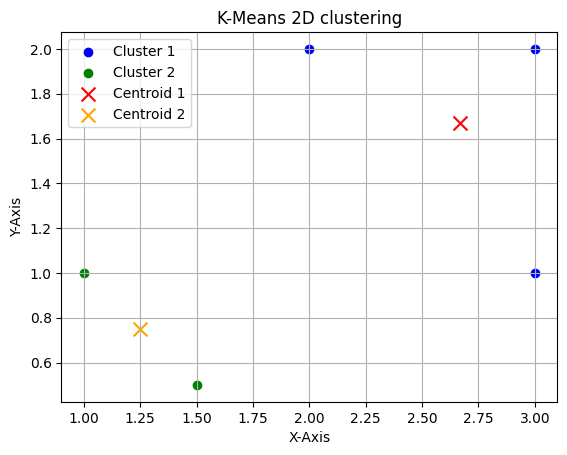

In [16]:
import math
import random
import matplotlib.pyplot as plt

def euclidean(p1,p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def mean_point(cluster):
    x_total = sum(point[0] for point in cluster)
    y_total = sum(point[1] for point in cluster)
    return [round(x_total / len(cluster),2), round(y_total / len(cluster),2)]

user_input = input("Enter the 2D coordinated separated by semicolon (e.g. 1 1; 2 2;.....: ")
arr = [list(map(float, pair.strip().split())) for pair in user_input.strip().split(';')]
k1,k2 = random.sample(arr,2)

print("The Initial Centroids are: ")
print("k1: ",k1)
print("k2: ",k2)

while True:
    k1new = []
    k2new = []
    
    for point in arr:
        d1 = euclidean(point,k1)
        d2 = euclidean(point,k2)

        if d1 <= d2:
            k1new.append(point)
        else:
            k2new.append(point)

    print("The Clusters are: ");
    print("k1: :",k1new)
    print("k2: :",k2new)

    m1 = mean_point(k1new)
    m2 = mean_point(k2new)

    print("The centroids are: ")
    print("m1: ",m1)
    print("m2: ",m2)
    print()

    if m1 == k1 and m2 == k2:
        print("The Final Clusters are: ")
        print("k1: ",k1new)
        print("k2: ",k2new)
        print("The final Centroids are: ")
        print("m1: ",m1)
        print("m2: ",m2)
        break

    k1 = m1
    k2 = m2

x1 = [p[0] for p in k1new]
y1 = [p[1] for p in k1new]

x2 = [p[0] for p in k2new]
y2 = [p[1] for p in k2new]

plt.scatter(x1,y1,color='blue', label='Cluster 1')
plt.scatter(x2,y2,color='green', label='Cluster 2')

plt.scatter(m1[0], m1[1], color='red',marker='x',s=100,label = 'Centroid 1')
plt.scatter(m2[0], m2[1], color='orange',marker='x',s=100,label = 'Centroid 2')

plt.title('K-Means 2D clustering')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.grid(True)
plt.show()